# Computer Vision Workshop 1
Copyright (c) 2020 by Jiachen (Jason) Zhou, aUToronto.

### Be sure to check out KITTI's data format description in ./kitti/devkit_readme.txt before you start.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
from PIL import Image

In [2]:
cwd = os.getcwd()
kitti_dataset = os.path.join(cwd, "kitti/training")
filename = '000152'
calib_path = os.path.join(kitti_dataset, 'calib/{}.txt'.format(filename))
image_path = os.path.join(kitti_dataset, 'image_2/{}.png'.format(filename))
label_path = os.path.join(kitti_dataset, 'label_2/{}.txt'.format(filename))

In [3]:
def read_calib(calib_path):
    """Read in calibration file as camera matrix.
    
    Args:
        calib_path (str): Path to the calibration file.
    
    Returns:
        numpy.ndarray: Camera matrix, size 3 x 4, type float32.
    """
    f = open(calib_path, 'r')
    for i, line in enumerate(f):
        if i == 2:  # TODO: Understand why we use the third row P2.
            # TODO: Parse this line so that it becomes a 3 x 4 camera matrix.
            
            return calib

In [4]:
def compute_box_3d(dim, location, rotation_y):
    """Compute the 8 vertices of a 3D bounding box, each is (x,y,z).
    
    Args:
        dim (list): Groundtruth bounding box dimension, length 3.
        location (list): Groundtruth bounding box bottom centre location, length 3.
        rotation_y (float): Groundtruth rotation ry around Y-axis in camera coordinates.
    
    Returns:
        numpy.ndarray: Locations of 8 vertices of a 3D bound, size 8 x 3, type float32.
    """
    # Get 3D rotation matrix
    c, s = np.cos(rotation_y), np.sin(rotation_y)
    R = np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]], dtype=np.float32)
    
    # TODO: Get box vertices relative to the centre location.
    l, w, h = dim[2], dim[1], dim[0]
    x_corners = 
    y_corners = 
    z_corners = 

    corners = np.array([x_corners, y_corners, z_corners], dtype=np.float32)  # size 3 x 8
    
    # Rotate the box vertices by the rotation matrix R
    corners_3d = np.dot(R, corners)
    
    # Add centre location as the translation vector
    corners_3d = corners_3d + np.array(location, dtype=np.float32).reshape(3, 1)
    return corners_3d.transpose(1, 0)

In [5]:
def project_to_image(pts_3d, cam_matrix):
    """Project 3D points to 2D image plane.
    
    Args:
        pts_3d (numpy.ndarray): Points in the 3D frame, size n x 3.
        cam_matrix (numpy.ndarray): Camera matrix, size 3 x 4.
    
    Returns:
        numpy.ndarray: Points in the 2D plane, size n x 2, type float32.
    """
    # TODO: Convert to homogeneous scene coord.
    
    # TODO: Project to 2D image plane.
    
    # TODO: Normalize to homogeneous pixel coord.
    
    return pts_2d

In [6]:
def project_3d_bbox(dim, location, rotation_y, cam_matrix):
    """Project 3D bounding box vertices to 2D image plane.
    
    Args:
        dim (list): Groundtruth bounding box dimension, length 3.
        location (list): Groundtruth bounding box bottom centre location, length 3.
        rotation_y (float): Groundtruth rotation ry around Y-axis in camera coordinates.
        cam_matrix (numpy.ndarray): Camera matrix, size 3 x 4.
    
    Returns:
        numpy.ndarray: 3D bounding box vertices projected in 2D, size 8 x 2, type float32.
    """
    bbox_3d = compute_box_3d(dim, location, rotation_y)
    bbox_3d_in_2d = project_to_image(bbox_3d, cam_matrix)
    return bbox_3d_in_2d

In [7]:
def read_label(label_path, calib_path):
    """Read in txt groundtruth label file as a list of annotations.
    
    Args:
        label_path (str): Path to the label file.
        calib_path (str): Path to the calibration file.
    
    Returns:
        list of dict: A list of dictionaries of each annotation.
    """
    annotations = []
    
    # read in calibration file as camera matrix
    cam_matrix = read_calib(calib_path)
    
    cats = ['Pedestrian', 'Car', 'Cyclist', 'Van', 'Truck',  'Person_sitting',
        'Tram', 'Misc', 'DontCare']
    cat_ids = {cat: i + 1 for i, cat in enumerate(cats)}
    f = open(label_path, 'r')
    for ann_ind, txt in enumerate(f):
        tmp = txt[:-1].split(' ')
        cat_id = cat_ids[tmp[0]]
        truncated = int(float(tmp[1]))
        occluded = int(tmp[2])
        alpha = float(tmp[3])
        bbox = [float(tmp[4]), float(tmp[5]), float(tmp[6]), float(tmp[7])]
        
        # TODO: Get dim, location, rotation_y from tmp
        dim = 
        location = 
        rotation_y = 
        
        # TODO: Get the 3D centroid location of a bounding box, size 1 x 3, type float32
        centroid_3d = 
        
        # Project 3D centroid to 2D and convert numpy.ndarray to a list
        centre_3d_to_2d = project_to_image(centroid_3d, cam_matrix)[0].tolist()
        
        # Project 3D bounding box vertices to 2D
        projected_3d_bbox = project_3d_bbox(dim, location, rotation_y, cam_matrix)
        
        # Form a 2D bounding box [x_min, y_min, x_max, y_max] from the 8 projected vertices
        min_uv = np.min(projected_3d_bbox, axis=0)
        max_uv = np.max(projected_3d_bbox, axis=0)
        bbox_3d_to_2d = np.concatenate([min_uv, max_uv], axis=0).tolist()

        # Construct a dictioinary for each annotation
        ann = {'id': int(len(annotations) + 1),
               'category_id': cat_id,
               'dim': dim,
               'bbox': bbox,
               'depth': location[2],
               'alpha': alpha,
               'truncated': truncated,
               'occluded': occluded,
               'location': location,
               'rotation_y': rotation_y,
               'centre_3d_to_2d': centre_3d_to_2d,
               'bbox_3d_to_2d': bbox_3d_to_2d,
               'projected_3d_bbox': projected_3d_bbox}
        annotations.append(ann)
    return annotations

In [8]:
annotations = read_label(label_path, calib_path)
annotations

[{'id': 1,
  'category_id': 2,
  'dim': [1.5, 1.55, 4.21],
  'bbox': [45.07, 196.83, 447.49, 374.0],
  'depth': 6.37,
  'alpha': -1.22,
  'truncated': 0,
  'occluded': 0,
  'location': [-2.67, 1.77, 6.37],
  'rotation_y': -1.6,
  'centre_3d_to_2d': [314.0317077636719, 288.30035400390625],
  'bbox_3d_to_2d': [44.81173324584961,
   195.74447631835938,
   448.52374267578125,
   473.5744934082031],
  'projected_3d_bbox': array([[315.43103 , 323.8867  ],
         [448.52374 , 323.0825  ],
         [311.27496 , 470.40286 ],
         [ 44.811733, 473.5745  ],
         [315.43103 , 195.86702 ],
         [448.52374 , 195.74448 ],
         [311.27496 , 218.19179 ],
         [ 44.811733, 218.67505 ]], dtype=float32)},
 {'id': 2,
  'category_id': 2,
  'dim': [1.82, 1.65, 3.67],
  'bbox': [751.85, 155.9, 1136.5, 374.0],
  'depth': 6.35,
  'alpha': -1.93,
  'truncated': 0,
  'occluded': 0,
  'location': [2.41, 1.74, 6.35],
  'rotation_y': -1.58,
  'centre_3d_to_2d': [890.0819702148438, 267.083801269

In [9]:
annotation = annotations[1]  # feel free to select other indices.

### Plot the 2D bounding box given directly by the groundtruth label and its 2D centre

centre of the 2D bbox:  (943, 264)


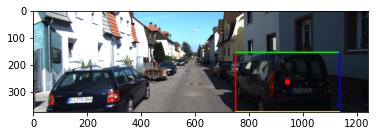

In [10]:
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
bbox = annotation['bbox']  # 'bbox' in the label are for 2D bbox
for i in range(len(bbox)):
    bbox[i] = int(bbox[i])  # make sure the pixels are integers
ct_dst = ((bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2)  # centre of the 2D bbox
print('centre of the 2D bbox: ', ct_dst)

# plotting
result_point = [(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[1]), (bbox[2], bbox[3])]
img = cv2.line(img, result_point[0], result_point[1], (255,0,0), 4)
img = cv2.line(img, result_point[0], result_point[2], (0,255,0), 4)
img = cv2.line(img, result_point[2], result_point[3], (0,0,255), 4)
img = cv2.line(img, result_point[1], result_point[3], (255,255,0), 4)
img = cv2.circle(img, tuple(ct_dst), radius=10, color=(255,0,0), thickness=-1)
plt.imshow(img)
plt.show()

### Plot the 2D bounding box projected by the 3D bounding box and its centre

centre of the projected bbox from 3D:  (945, 305)


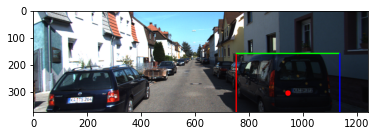

In [11]:
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
bbox = annotation['bbox_3d_to_2d']  # 'bbox_3d_to_2d' is computed by us
for i in range(len(bbox)):
    bbox[i] = int(bbox[i])
ct_dst = ((bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2)
print('centre of the projected bbox from 3D: ', ct_dst)
result_point = [(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[1]), (bbox[2], bbox[3])]
img = cv2.line(img, result_point[0], result_point[1], (255,0,0), 4)
img = cv2.line(img, result_point[0], result_point[2], (0,255,0), 4)
img = cv2.line(img, result_point[2], result_point[3], (0,0,255), 4)
img = cv2.line(img, result_point[1], result_point[3], (255,255,0), 4)
img = cv2.circle(img, tuple(ct_dst), radius=10, color=(255,0,0), thickness=-1)
plt.imshow(img)
plt.show()

#### Question: What differences do you observe?

Answer:

### Plot the projected vertices of the 3D bounding box

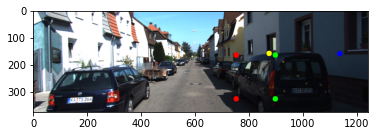

In [12]:
colors = [(255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,0), (0,255,0), (0,0,255), (255,255,0)]
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
projected_3d_bbox = annotation['projected_3d_bbox']
for i in range(len(projected_3d_bbox)):
    x, y = int(projected_3d_bbox[i][0]), int(projected_3d_bbox[i][1])
    img = cv2.circle(img, (x,y), radius=10, color=colors[i], thickness=-1)
plt.imshow(img)
plt.show()

#### Question: Why are some points not shown above?

Answer:

### Plot both the given 2D bounding box with its 2D centre, and the projected 3D centroid in 2D

centre of the 2D bbox:  (943, 264)
3D centroid projected to 2D:  (890, 267)


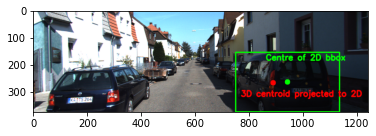

In [13]:
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
bbox = annotation['bbox']
for i in range(len(bbox)):
    bbox[i] = int(bbox[i])
ct_dst = ((bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2)
print('centre of the 2D bbox: ', ct_dst)
result_point = [(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[1]), (bbox[2], bbox[3])]
img = cv2.line(img, result_point[0], result_point[1], (0,255,0), 4)
img = cv2.line(img, result_point[0], result_point[2], (0,255,0), 4)
img = cv2.line(img, result_point[2], result_point[3], (0,255,0), 4)
img = cv2.line(img, result_point[1], result_point[3], (0,255,0), 4)
img = cv2.circle(img, tuple(ct_dst), radius=10, color=(0,255,0), thickness=-1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'Centre of 2D bbox', (ct_dst[0]-80, ct_dst[1]-80), font, 1, (0,255,0), 3, cv2.LINE_AA)


ct_dst = np.array(annotation['centre_3d_to_2d']).astype(np.int16).tolist()
print('3D centroid projected to 2D: ', tuple(ct_dst))
img = cv2.circle(img, tuple(ct_dst), radius=10, color=(255,0,0), thickness=-1)
cv2.putText(img, '3D centroid projected to 2D', (ct_dst[0]-120, ct_dst[1]+50), font, 1, (255,0,0), 3, cv2.LINE_AA)

# imageio.imwrite('kitti_understanding_000152.png', img)
plt.imshow(img)
plt.show()

#### Question: Why are these two centres not at the same location?

Answer:

### Reference
http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d